# RECÊNCIA, FREQUÊNCIA e VALOR

# Sumário

- [Etapa 1: Entendimento do Negócio](#etapa-1-entendimento-do-negócio)
- [Etapa 2: Entendimento dos Dados](#etapa-2-entendimento-dos-dados)
- [Etapa 3: Preparação dos Dados](#etapa-3-preparação-dos-dados)
- [Etapa 4: Modelagem](#etapa-4-modelagem)
- [Etapa 5: Avaliação](#etapa-5-avaliação)
- [Etapa 6: Implantação](#etapa-6-implantação)


## Etapa 1 CRISP - DM: Entendimento do negócio<a name="etapa-1-entendimento-do-negócio"></a>

**RFV** significa **recência**, **frequência** e **valor** é utilizado para segmentação de clientes baseado no comportamento de compras dos clientes e agrupa eles em clusters parecidos. Utilizando esse tipo de agrupamento podemos realizar ações de marketing e CRM melhores direcionadas, ajudando assim na personalização do conteúdo e até a retenção de clientes.

Para cada cliente é preciso calcular cada uma das componentes abaixo:

- Recência (R): Quantidade de dias desde a última compra.
- Frequência (F): Quantidade total de compras no período.
- Valor (V): Total de dinheiro gasto nas compras do período.

A segmentação é uma abordagem mais direcionada e orientada por necessidades específicas do negócio, com grupos definidos com base em características relevantes. Já a clusterização é uma técnica exploratória que identifica grupos com base na similaridade dos dados, sem necessariamente levar em conta as características específicas. 

## Etapa 2 CRISP-DM: Entendimento dos dados<a name="etapa-2-entendimento-dos-dados"></a>
Os dados são um exemplo simples sobre a aplicação do RFV em compras, e é um Data Frame de 4 colunas: ID_cliente, CodigoCompra, DiaCompra e ValorTotal. Onde cada linha é um registro de compra e as variáveis representam uma característica dela.


### Dicionário de dados:


|variavel|descrição|
|-|-|
|ID_cliente              | Código de identificação do cliente |
|CodigoCompra            | Código de identificação da compra|
|DiaCompra               | Data da compra|
|ValorTotal              | Valor Total da compra|


#### Carregando os pacotes


In [374]:
import numpy as np
import pandas as pd
import ydata_profiling as pp
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
from datetime import datetime


#### Carregando os dados


In [357]:
# Gerando e observando o DataFrame
df = pd.read_csv('dados_input 1.csv',
                  infer_datetime_format=True, # Transformando ata em Datetime
                  parse_dates=['DiaCompra'])
df.head(5)

,ID_cliente,CodigoCompra,DiaCompra,ValorTotal
0,12747,537215,2020-12-05,358.56
1,12747,538537,2020-12-13,347.71
2,12747,541677,2021-01-20,303.04
3,12747,545321,2021-03-01,310.78
4,12747,551992,2021-05-05,442.96


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição e características de todas as variáveis. 

In [358]:
# Usando o pandas_profiling para gerar um html com informações e estatísticas gerais de cada variável
profile = pp.ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [359]:
# Uma opção mais resumida para informações das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16127 entries, 0 to 16126
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_cliente    16127 non-null  int64         
 1   CodigoCompra  16127 non-null  int64         
 2   DiaCompra     16127 non-null  datetime64[ns]
 3   ValorTotal    16127 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 504.1 KB


 - 16127 registros de compras, não há dados faltantes e vemos que os IDs de clientes se repetem, o que quer dizer que possuem compras do mesmo cliente na base de dados

### Entendimento dos dados - Descritiva




#### Distribuição: 

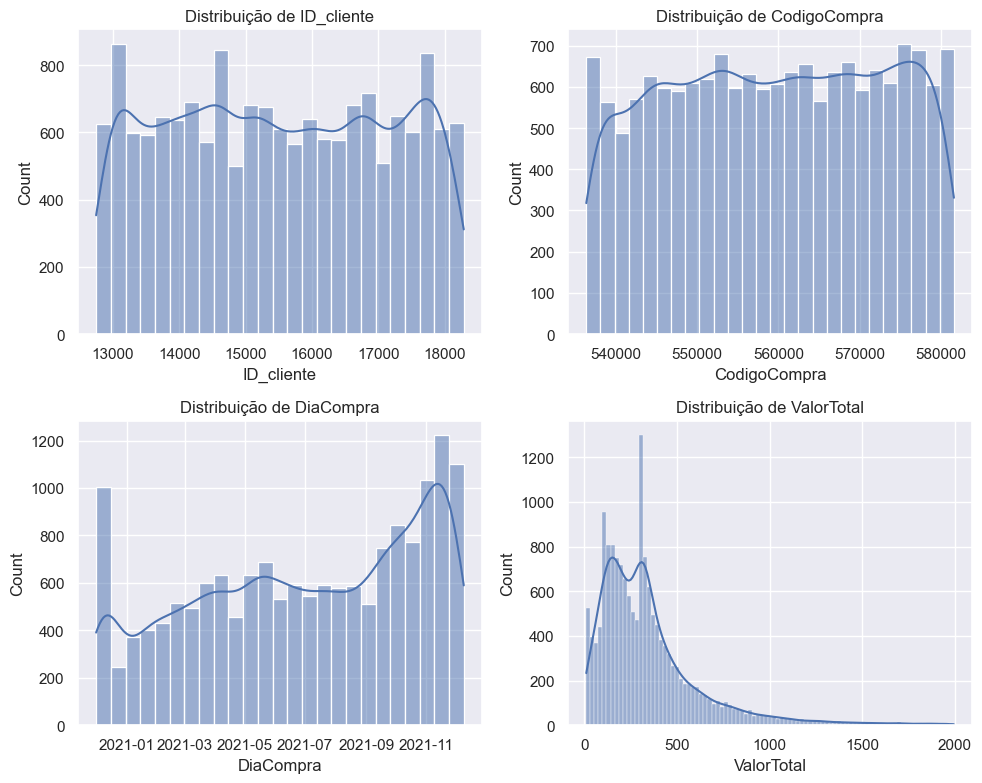

In [435]:
# Função para plotar histogramas das colunas
def plot_histogram(df):
    num_cols = len(df.columns)
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i, column in enumerate(df.columns):
        row = i // 2
        col = i % 2
        sns.histplot(data=df, x=column, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Distribuição de {column}')

    plt.tight_layout()
    plt.show()

# Chamar a função para plotar histogramas das colunas do DataFrame
plot_histogram(df)

#### Valor total pelo tempo:

In [411]:
def plot_valor_total_por_mes(df):
    # Converter a coluna DiaCompra para o formato de data
    df['DiaCompra'] = pd.to_datetime(df['DiaCompra'])
    
    # Agrupar os dados por mês e calcular a média do ValorTotal
    df_monthly = df.groupby(df['DiaCompra'].dt.to_period('M'))['ValorTotal'].mean().reset_index()
    
    # Converter a coluna DiaCompra para o formato de string
    df_monthly['DiaCompra'] = df_monthly['DiaCompra'].astype(str)
    
    # Configurar estilo Seaborn
    sns.set(style='darkgrid')
    
    # Criar uma figura vazia
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plotar o gráfico de linha
    sns.lineplot(data=df_monthly, x='DiaCompra', y='ValorTotal', marker='o', ax=ax)
    
    # Definir rótulos e título do gráfico
    ax.set_xlabel('Data de Compra (Mês)')
    ax.set_ylabel('Valor Total')
    ax.set_title('Relação do Valor Médio Total por Mês')
    
    # Exibir o gráfico
    plt.show()

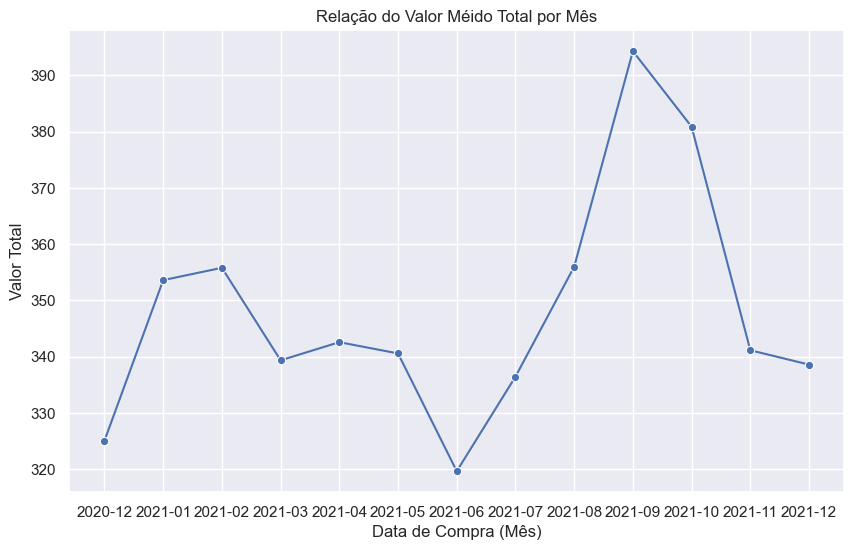

In [410]:
plot_valor_total_por_mes(df)

- Nada anormal que não nos permita aplicar o RFV

## Etapa 3 Crisp-DM: Preparação dos dados<a name="etapa-3-preparação-dos-dados"></a>
Nessa etapa realizaremo as transformações nos dados para o modelo


- Como vimos no entendimento dos dados, nenhuma preparação é nescessária, para melhor entendimento qualquer mudança será realizada na párte de criação do **RFV**

## Etapa 4 Crisp-DM: Modelagem<a name="etapa-4-modelagem"></a>
Nessa etapa que realizaremos a construção do **RFV**. Os passos típicos são:
- **Recência**
- **Frequência**
- **Valor**


### Recência


**Quantos dias faz que o cliente fez a sua última compra?**

In [ ]:
def criar_df_recencia(df):
    # Groupby por clientes e verifica a última compra deles
    df_recencia = df.groupby(by='ID_cliente', as_index=False)['DiaCompra'].max()
    df_recencia.columns = ['ID_cliente', 'DiaUltimaCompra']

    # Capturando dia atual
    dia_atual = pd.Timestamp(datetime.today().date())

    # Calculando a Recencia que é a diferença entre o dia atual e a última compra
    df_recencia['Recencia'] = df_recencia['DiaUltimaCompra'].apply(lambda x: (dia_atual - x).days)

    return df_recencia

In [413]:
#Groupby por clientes e verifica a última compra deles
df_recencia = df.groupby(by='ID_cliente',
                                 as_index=False)['DiaCompra'].max()
df_recencia.columns = ['ID_cliente', 'DiaUltimaCompra']
df_recencia.head()

,ID_cliente,DiaUltimaCompra
0,12747,2021-12-07
1,12748,2021-12-09
2,12749,2021-12-06
3,12820,2021-12-06
4,12821,2021-05-09


In [416]:
# Capturando dia atual
dia_atual = pd.Timestamp(datetime.today().date())

# Calculando a Recencia que é a diferença entre o dia atual e a última compra
df_recencia['Recencia'] = df_recencia['DiaUltimaCompra'].apply(
    lambda x: (dia_atual - x).days)

In [419]:
df_recencia.head(5)

,ID_cliente,Recencia
0,12747,567
1,12748,565
2,12749,568
3,12820,568
4,12821,779


### Frequência

#### **Quantas vezes cada cliente comprou com a gente?**

In [ ]:
def criar_df_frequencia(df):
    # Agrupando os clientes e código de compra para obter a frequência de compras
    df_frequencia = df[['ID_cliente', 'CodigoCompra']].groupby('ID_cliente').count().reset_index()
    df_frequencia.columns = ['ID_cliente', 'Frequencia']

    return df_frequencia

In [421]:
# Agrupando os clientes e código de compra, o que mostra a Frequência que os clientes compraram
df_frequencia = df[['ID_cliente', 'CodigoCompra'
                            ]].groupby('ID_cliente').count().reset_index()
df_frequencia.columns = ['ID_cliente', 'Frequencia']
df_frequencia.head()

,ID_cliente,Frequencia
0,12747,11
1,12748,178
2,12749,5
3,12820,4
4,12821,1


### Valor

**Quanto que cada cliente gastou no periodo?**

In [423]:
# Agrupando o valor total por cliente
df_valor = df[['ID_cliente', 'ValorTotal'
                       ]].groupby('ID_cliente').sum().reset_index()
df_valor.columns = ['ID_cliente', 'Valor']
df_valor.head()

,ID_cliente,Valor
0,12747,4196.01
1,12748,31533.04
2,12749,4090.88
3,12820,942.34
4,12821,92.72


### Criando a tabela RFV

In [427]:
# Juntando o RFV de acordo com o cliente
df_RFV = pd.merge(pd.merge(df_recencia, df_frequencia, on='ID_cliente'), df_valor, on='ID_cliente')
df_RFV.head(5)

,ID_cliente,Recencia,Frequencia,Valor
0,12747,567,11,4196.01
1,12748,565,178,31533.04
2,12749,568,5,4090.88
3,12820,568,4,942.34
4,12821,779,1,92.72


### Segmentação de clientes utilizando o RFV

Um jeito de segmentar os clientes é criando quartis para cada componente do RFV, sendo que o melhor quartil é chamado de 'A', o segundo melhor quartil de 'B', o terceiro melhor de 'C' e o pior de 'D'. O melhor e o pior depende da componente. Po exemplo, quanto menor a recência melhor é o cliente (pois ele comprou com a gente tem pouco tempo) logo o menor quartil seria classificado como 'A', já pra componente frêquencia a lógica se inverte, ou seja, quanto maior a frêquencia do cliente comprar com a gente, melhor ele/a é, logo, o maior quartil recebe a letra 'A'.

Se a gente tiver interessado em mais ou menos classes, basta a gente aumentar ou diminuir o número de quantils pra cada componente.

#### Quartis para o RFV

In [430]:
# Quartis de acordo com a quantidade de categorias de clientes como são 4, 4 quartis
quartis = df_RFV.quantile(q=[0.25, 0.5, 0.75]).drop('ID_cliente', axis=1)
quartis

,Recencia,Frequencia,Valor
0.25,582.0,1.0,299.705
0.50,615.0,2.0,643.555
0.75,708.0,5.0,1533.600


In [431]:
# Passando os quartis para dicionário para usar na função
quartis.to_dict()

{'Recencia': {0.25: 582.0, 0.5: 615.0, 0.75: 708.0},
 'Frequencia': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Valor': {0.25: 299.70500000000004, 0.5: 643.555, 0.75: 1533.6}}

#### Funções que criam as classes

In [432]:
def recencia_class(x, r, q_dict):
    """Classifica como melhor o menor quartil 
       x = valor da linha,
       r = recencia,
       q_dict = quartil dicionario   
    """
    if x <= q_dict[r][0.25]:
        return 'A'
    elif x <= q_dict[r][0.50]:
        return 'B'
    elif x <= q_dict[r][0.75]:
        return 'C'
    else:
        return 'D'


def freq_val_class(x, fv, q_dict):
    """Classifica como melhor o maior quartil 
       x = valor da linha,
       fv = frequencia ou valor,
       q_dict = quartil dicionario   
    """
    if x <= q_dict[fv][0.25]:
        return 'D'
    elif x <= q_dict[fv][0.50]:
        return 'C'
    elif x <= q_dict[fv][0.75]:
        return 'B'
    else:
        return 'A'

In [433]:
# Criando a coluna de classificação da Recencia
df_RFV['R_quartil'] = df_RFV['Recencia'].apply(recencia_class,
                                                args=('Recencia', quartis))
# Criando a coluna de classificação da Frequencia
df_RFV['F_quartil'] = df_RFV['Frequencia'].apply(freq_val_class,
                                                  args=('Frequencia', quartis))
# Criando a coluna de classificação da Valor
df_RFV['V_quartil'] = df_RFV['Valor'].apply(freq_val_class,
                                             args=('Valor', quartis))

In [434]:
df_RFV.head()

,ID_cliente,Recencia,Frequencia,Valor,R_quartil,F_quartil,V_quartil
0,12747,567,11,4196.01,A,A,A
1,12748,565,178,31533.04,A,A,A
2,12749,568,5,4090.88,A,B,A
3,12820,568,4,942.34,A,B,B
4,12821,779,1,92.72,D,D,D


## Etapa 5 Crisp-DM: Avaliação dos resultados<a name="etapa-5-avaliação"></a>


### Avaliação dos modelos:

Por ser um modelo de **segmentação** a avaliação é feita após as campanhas de marketing ou criação de produtos e serviços

## Etapa 6 Crisp-DM: Implantação<a name="etapa-6-implantação"></a>


>A implantação do projeto vai ocorrer em forma de aplicação utilizando o framework **STREAMLIT**, o script que vai estar no repositório no git hub